In [36]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_excel("updated_visa_statistics.xlsx")
df

,Date and Time,Nationality,Visa Class,Issuances
0,2024-08-13 08:56:00,*Non-Nationality Based Issuances,B1/B2,141
1,2024-08-01 10:02:00,*Non-Nationality Based Issuances,F1,23
2,2024-10-22 11:17:00,*Non-Nationality Based Issuances,F2,4
3,2024-06-13 10:59:00,*Non-Nationality Based Issuances,G4,25
4,2024-06-10 11:17:00,*Non-Nationality Based Issuances,H1B,2
...,...,...,...,...
43839,2024-08-20 14:34:00,Zimbabwe,J1,25
43840,2024-07-16 08:00:00,Zimbabwe,J2,13
43841,2024-04-16 10:17:00,Zimbabwe,K1,8
43842,2024-04-08 10:39:00,Zimbabwe,L1,1


## Exploratory Data Analysis

In [41]:
df.shape

(43844, 4)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43844 entries, 0 to 43843
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  43844 non-null  datetime64[ns]
 1   Nationality    43844 non-null  object        
 2   Visa Class     43844 non-null  object        
 3   Issuances      43844 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.3+ MB


In [45]:
df.isnull().sum()

Date and Time    0
Nationality      0
Visa Class       0
Issuances        0
dtype: int64

In [47]:
df.duplicated().sum()

0

## Plot distribution of visa issuances by visa class

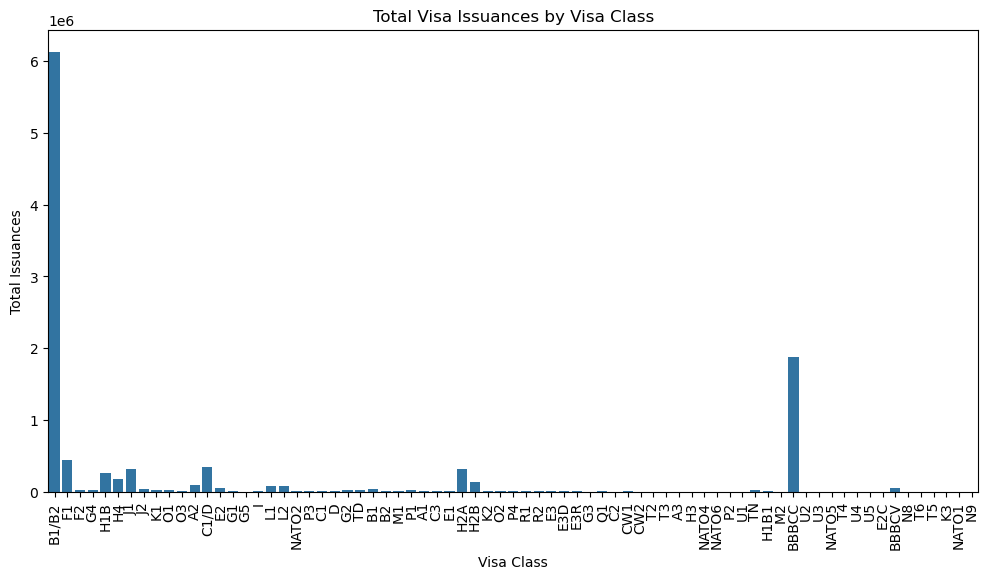

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Visa Class", y="Issuances", estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title("Total Visa Issuances by Visa Class")
plt.xlabel("Visa Class")
plt.ylabel("Total Issuances")
plt.show()

## Monthly Trends in Visa Issuances

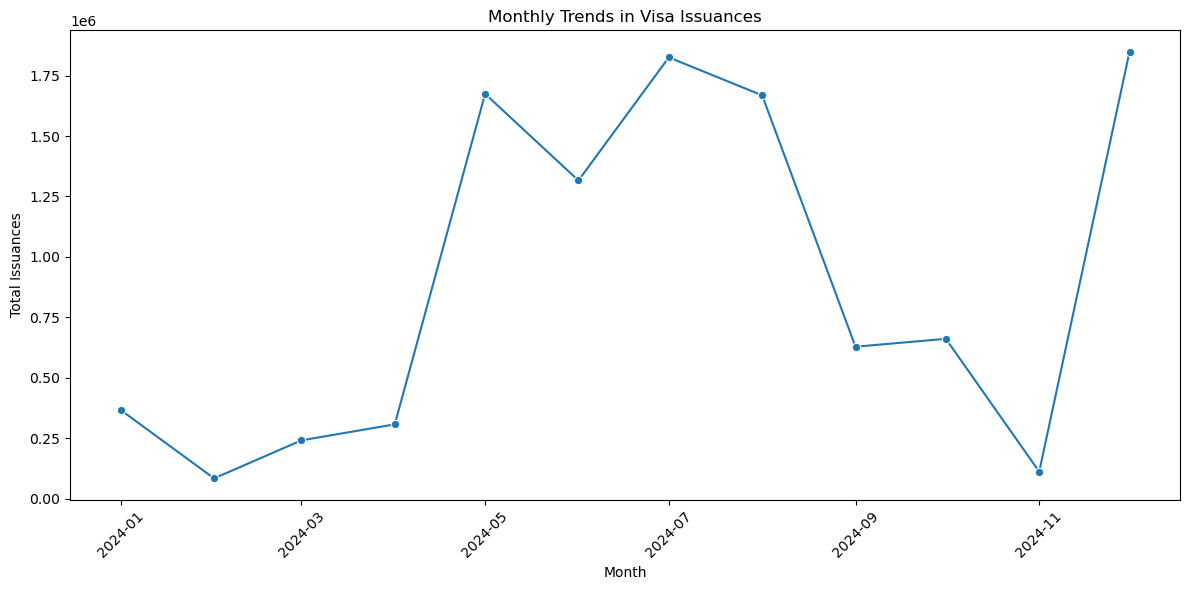

In [51]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df['Month'] = df['Date and Time'].dt.to_period('M').astype(str)

monthly_issuances = df.groupby('Month')['Issuances'].sum().reset_index()

monthly_issuances['Month'] = pd.to_datetime(monthly_issuances['Month'])
monthly_issuances = monthly_issuances.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_issuances, x="Month", y="Issuances", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Trends in Visa Issuances")
plt.xlabel("Month")
plt.ylabel("Total Issuances")
plt.tight_layout()
plt.show()

## Top 10 Nationalities by total Visa Issuances

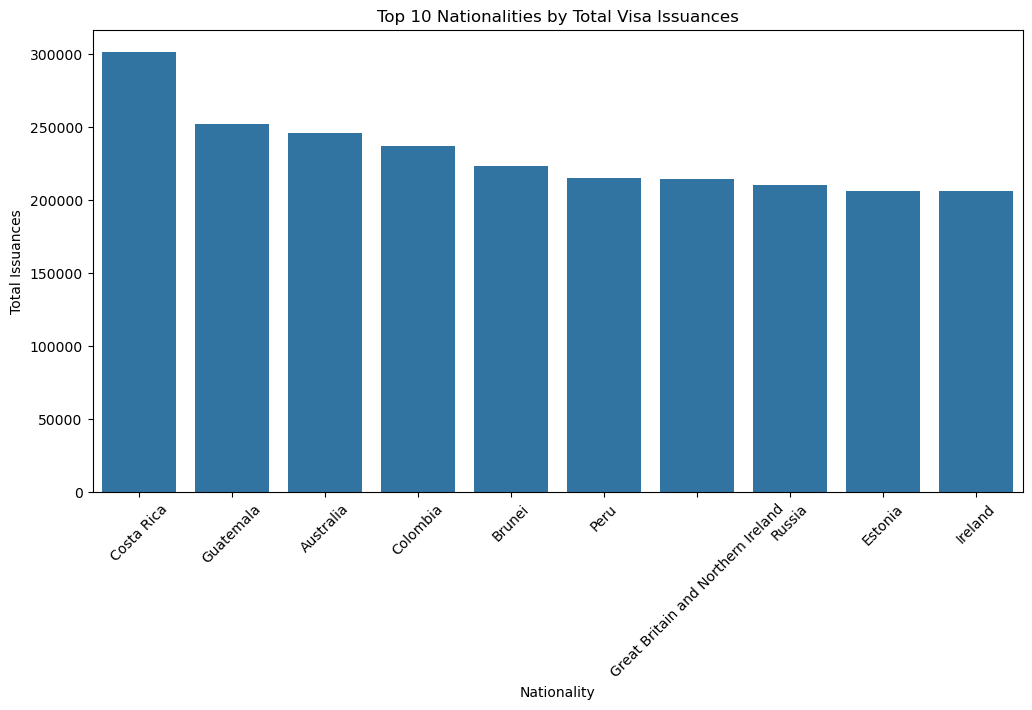

In [53]:
top_nationalities = df.groupby("Nationality")["Issuances"].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values)
plt.xticks(rotation=45)
plt.title("Top 10 Nationalities by Total Visa Issuances")
plt.xlabel("Nationality")
plt.ylabel("Total Issuances")
plt.show()


## Visa Issuances by Month and Visa Class

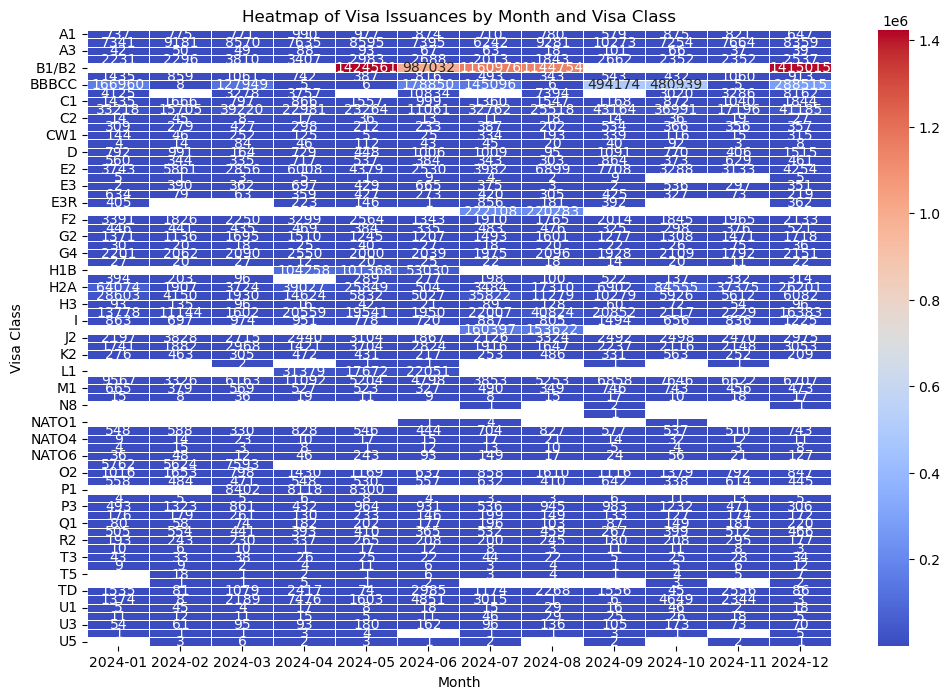

In [55]:
pivot_table = df.pivot_table(values="Issuances", index="Visa Class", columns="Month", aggfunc="sum")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Visa Issuances by Month and Visa Class")
plt.xlabel("Month")
plt.ylabel("Visa Class")
plt.show()

## Time Series Analysis using ARIMA Model for Forecasting the visa issuances for the next 3 months

In [58]:
df.copy()

,Date and Time,Nationality,Visa Class,Issuances,Month
0,2024-08-13 08:56:00,*Non-Nationality Based Issuances,B1/B2,141,2024-08
1,2024-08-01 10:02:00,*Non-Nationality Based Issuances,F1,23,2024-08
2,2024-10-22 11:17:00,*Non-Nationality Based Issuances,F2,4,2024-10
3,2024-06-13 10:59:00,*Non-Nationality Based Issuances,G4,25,2024-06
4,2024-06-10 11:17:00,*Non-Nationality Based Issuances,H1B,2,2024-06
...,...,...,...,...,...
43839,2024-08-20 14:34:00,Zimbabwe,J1,25,2024-08
43840,2024-07-16 08:00:00,Zimbabwe,J2,13,2024-07
43841,2024-04-16 10:17:00,Zimbabwe,K1,8,2024-04
43842,2024-04-08 10:39:00,Zimbabwe,L1,1,2024-04


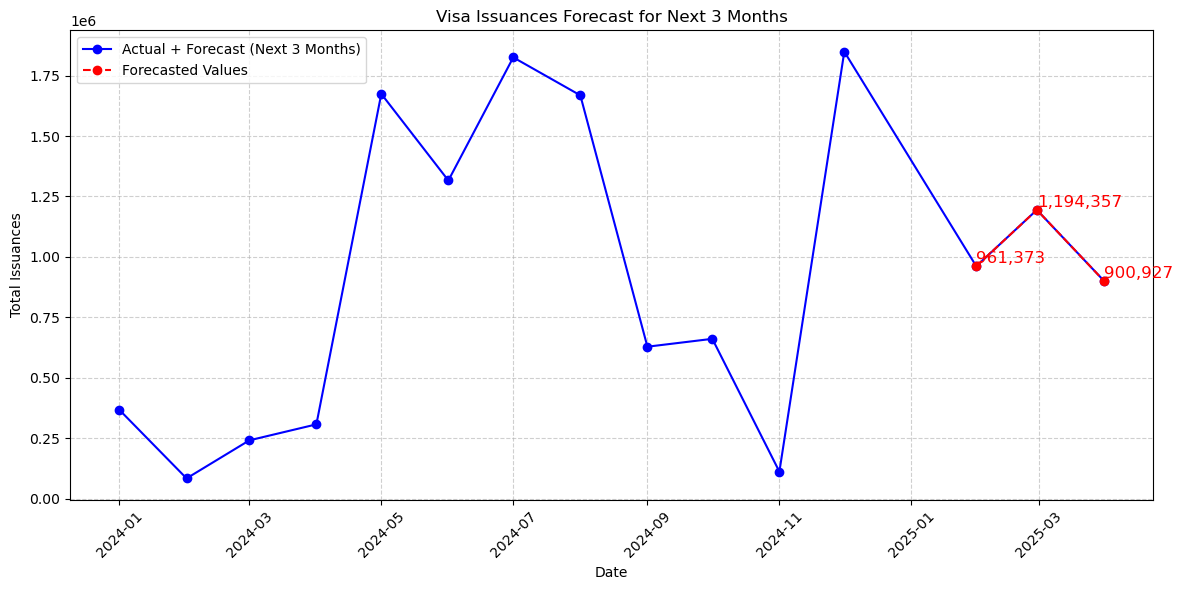

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_excel("updated_visa_statistics.xlsx", sheet_name="Sheet1")

df['Date'] = pd.to_datetime(df['Date and Time'])
df['Issuances'] = pd.to_numeric(df['Issuances'], errors='coerce')

monthly_issuances = df.groupby(df['Date'].dt.to_period('M'))['Issuances'].sum()
monthly_issuances.index = monthly_issuances.index.to_timestamp()

model = ARIMA(monthly_issuances, order=(2, 1, 2))
model_fit = model.fit()

forecast_steps = 3
forecast_index = pd.date_range(start=monthly_issuances.index[-1] + pd.DateOffset(months=1),
                               periods=forecast_steps, freq='M')
forecast_values = model_fit.forecast(steps=forecast_steps)

full_dates = monthly_issuances.index.tolist() + forecast_index.tolist()
full_values = monthly_issuances.values.tolist() + forecast_values.tolist()

plt.figure(figsize=(12, 6))
plt.plot(full_dates, full_values, marker='o', linestyle='-', color='blue', label="Actual + Forecast (Next 3 Months)")
plt.plot(forecast_index, forecast_values, marker='o', linestyle='dashed', color='red', label="Forecasted Values")

for i, txt in enumerate(forecast_values):
    plt.text(forecast_index[i], txt, f"{txt:,.0f}", verticalalignment='bottom', fontsize=12, color='red')

plt.title("Visa Issuances Forecast for Next 3 Months")
plt.xlabel("Date")
plt.ylabel("Total Issuances")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Using Elbow Method for determining the optimal number of clusters (k)

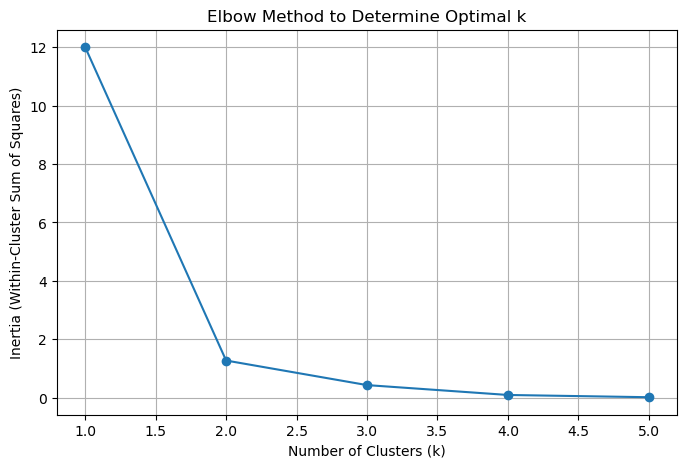

In [70]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
# Calculate distortion for a range of cluster numbers
inertia = []
# Adjust the range of K to be compatible with the number of samples
# The number of clusters cannot be more than the number of samples.
K = range(1, min(len(X), 11)) # Ensure the maximum k is not greater than the number of samples

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

## Cluster Analysis of Visa applications based on time and visa type

In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load your dataset
df = pd.read_excel("updated_visa_statistics.xlsx")  # Make sure this file is in your working directory

# Convert 'Date and Time' to datetime
df['Date and Time'] = pd.to_datetime(df['Date and Time'])

# Extract hour from timestamp
df['Hour'] = df['Date and Time'].dt.hour

# Encode visa class to numeric
label_encoder = LabelEncoder()
df['Visa Class Encoded'] = label_encoder.fit_transform(df['Visa Class'])

# Prepare features for clustering
X = df[['Hour', 'Visa Class Encoded']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: View first few clustered rows
print(df[['Date and Time', 'Visa Class', 'Hour', 'Cluster']])

            Date and Time Visa Class  Hour  Cluster
0     2024-08-13 08:56:00      B1/B2     8        3
1     2024-08-01 10:02:00         F1    10        0
2     2024-10-22 11:17:00         F2    11        0
3     2024-06-13 10:59:00         G4    10        0
4     2024-06-10 11:17:00        H1B    11        0
...                   ...        ...   ...      ...
43839 2024-08-20 14:34:00         J1    14        2
43840 2024-07-16 08:00:00         J2     8        0
43841 2024-04-16 10:17:00         K1    10        0
43842 2024-04-08 10:39:00         L1    10        0
43843 2024-03-01 09:37:00         O1     9        4

[43844 rows x 4 columns]


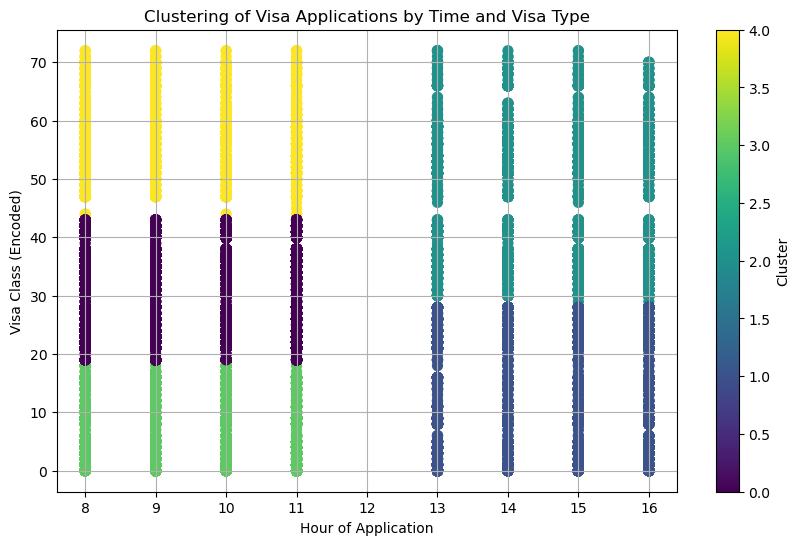

In [74]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Hour'], df['Visa Class Encoded'], c=df['Cluster'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.title("Clustering of Visa Applications by Time and Visa Type")
plt.xlabel("Hour of Application")
plt.ylabel("Visa Class (Encoded)")
plt.grid(True)
plt.show()